# Load images

In [ ]:
from PIL import Image
import os

# Define the path to the images and load them into a dictionary
image_paths = [
    "SeaLake_1.jpg","SeaLake_33.jpg","SeaLake_7.jpg","SeaLake_35.jpg",
    "SeaLake_2.jpg","SeaLake_39.jpg","SeaLake_8.jpg","SeaLake_11.jpg","SeaLake_41.jpg",
    "SeaLake_3.jpg","SeaLake_36.jpg","SeaLake_9.jpg","SeaLake_43.jpg","SeaLake_44.jpg",
    "Forest_4.jpg","Forest_2.jpg","Forest_20.jpg","Forest_21.jpg","Forest_22.jpg",
    "Forest_8.jpg","Forest_23.jpg","Forest_29.jpg","Forest_30.jpg","Forest_5.jpg",
    "Forest_3.jpg",
    "desert(1).jpg","desert(5).jpg","desert(6).jpg","desert(7).jpg","desert(8).jpg",
    "desert(2).jpg","desert(9).jpg","desert(10).jpg","desert(11).jpg","desert(12).jpg",
    "desert(3).jpg","desert(13).jpg","desert(14).jpg","desert(15).jpg","desert(16).jpg",
    "desert(4).jpg","desert(17).jpg","desert(18).jpg","desert(19).jpg","desert(20).jpg",
]

# Load the images using PIL
images = {os.path.basename(path): Image.open(path) for path in image_paths}

# Check the first image size as a reference
first_image_size = images[next(iter(images))].size
first_image_size, len(images)


((64, 64), 45)

In [ ]:
from torchvision.models import resnet50
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
import torch

# Load a pre-trained ResNet-50 model
model = resnet50(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Define the image transformations
preprocess = Compose([
    Resize(256),
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Function to get the embeddings from the model
def get_embedding(image, model, preprocess):
    # Preprocess the image and add batch dimension
    input_tensor = preprocess(image).unsqueeze(0)
    # Use the model to get the features
    with torch.no_grad():
        features = model(input_tensor)
    # Remove the batch dimension and convert to numpy
    return features.squeeze(0).numpy()

# Extract embeddings for all images
embeddings = {name: get_embedding(image, model, preprocess) for name, image in images.items()}

# Check the shape of the embeddings for the first image
next(iter(embeddings.values())).shape


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 118MB/s]


(1000,)

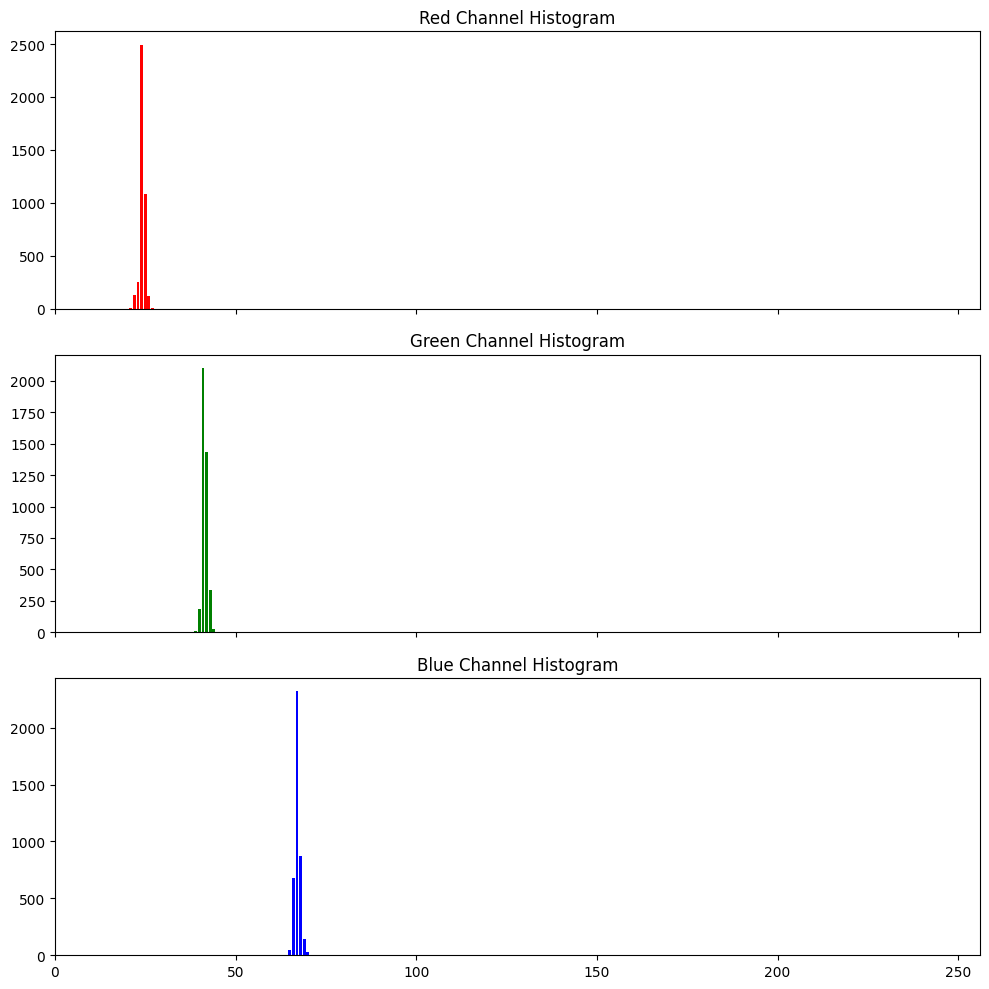

(45, 768)

In [ ]:
import numpy as np

# Function to compute a color histogram for an image
def compute_color_histogram(image):
    # Convert the image to numpy array and reshape to list of RGB values
    pixels = np.array(image).reshape(-1, 3)
    # Compute the histogram for each color channel
    hist_red = np.histogram(pixels[:, 0], bins=256, range=(0, 255))[0]
    hist_green = np.histogram(pixels[:, 1], bins=256, range=(0, 255))[0]
    hist_blue = np.histogram(pixels[:, 2], bins=256, range=(0, 255))[0]
    # Concatenate the histograms into a single feature vector
    histogram = np.concatenate((hist_red, hist_green, hist_blue))
    return histogram

# Read the images and compute histograms
histograms = {}
for path in image_paths:
    with Image.open(path) as img:
        histograms[path] = compute_color_histogram(img)

# Now we'll draw the histograms for the first image as an example
first_image_histogram = histograms[image_paths[0]]

# Create subplots for each color channel
fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

# Set the colors for each histogram
colors = ('red', 'green', 'blue')

# Plot each color histogram
for i, (color, ax) in enumerate(zip(colors, axs)):
    ax.bar(range(256), first_image_histogram[i * 256:(i + 1) * 256], color=color)
    ax.set_title(f'{color.capitalize()} Channel Histogram')
    ax.set_xlim([0, 256])

plt.tight_layout()
plt.show()

# Extract color histograms for all images
histograms = {name: compute_color_histogram(image) for name, image in images.items()}

# Convert histograms to a numpy array for clustering
histogram_array = np.array(list(histograms.values()))

# Check the shape of the histogram array
histogram_array.shape

In [ ]:
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from PIL import Image

def get_image_embeddings(image_paths):
    return np.random.rand(1, 512)

embeddings = np.vstack([get_image_embeddings(path) for path in image_paths])

# Perform K-Means clustering

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Perform PCA for visualization purposes

In [ ]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)


# Visualization of clusters


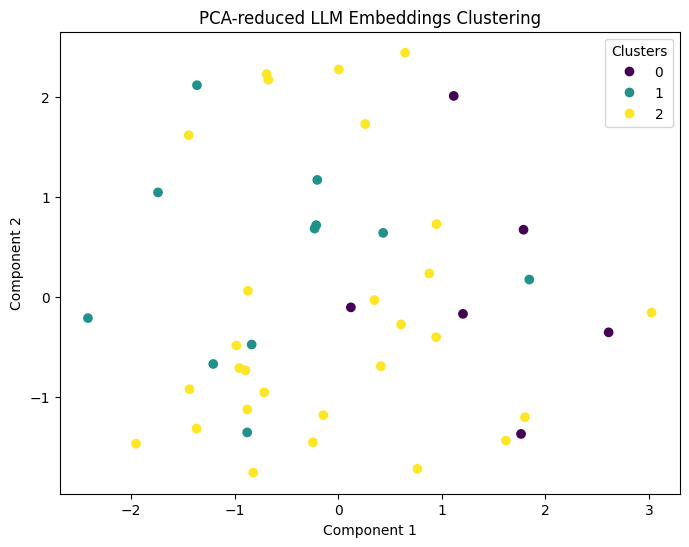

In [ ]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('PCA-reduced LLM Embeddings Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()